<a href="https://colab.research.google.com/github/dakshinamurthy/ai_pro/blob/main/GenAI_Journey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 22.7 MB/s eta 0:00:00


In [5]:
from IPython.display import display
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

model = genai.GenerativeModel('gemini-pro')

In [14]:
response = model.generate_content("Tell me about the journey of Bilbo Baggins")
print(response.text)

**The Hobbit: An Unexpected Journey**

* **Beginning:** Bilbo Baggins, a timid hobbit, is recruited by Gandalf the wizard and 13 dwarves for a quest to reclaim the Lonely Mountain from the dragon Smaug.
* **Middle:** Bilbo faces perils such as trolls, goblins, and the treacherous Misty Mountains, where he discovers the One Ring.
* **End:** The company reaches Rivendell, where Elrond the elf reveals the Ring's dangerous nature. Bilbo and the dwarves prepare for the final phase of their journey.

**The Hobbit: The Desolation of Smaug**

* **Beginning:** The company continues its journey through Mirkwood Forest, where they encounter giant spiders and a battle with giant spiders.
* **Middle:** They arrive at Lake-town, seeking aid in their quest against Smaug. Bilbo infiltrates the mountain and discovers Smaug's weakness.
* **End:** The company confronts Smaug and launches an assault on the mountain, ultimately slaying the dragon but losing Thorin Oakenshield, the leader.

**The Hobbit: Th

In [12]:
# prompt: Give me python code to read user input and send the input to google gemini
# Read the output and print it in markdown

# Import the Python SDK
# Used to securely store your API key


GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

model = genai.GenerativeModel('gemini-pro')

# Get user input
user_input = input("Enter a prompt: ")

# Send the input to Google Gemini
response = model.generate_content(user_input)

# Print the output in markdown
display(to_markdown(response.text))


Enter a prompt: Let's define registration_rate as registered_count/eligible_count Using the table employer_registration_data in sqlite can u give me a SQL query that gives me the following Year on Year Analysis of registration_rate for the years 2021, 2022, 2023 for the months June to October Give ONLY the query without the prepending ```sql and no explanation around the code. This has to be passed to a code interpreter.


> ```
> WITH YearOnYear AS (
>   SELECT
>     school_year,
>     month,
>     registration_rate,
>     LEAD(registration_rate, 12) OVER (PARTITION BY school_year ORDER BY month) AS y1_rate,
>     LEAD(registration_rate, 24) OVER (PARTITION BY school_year ORDER BY month) AS y2_rate
>   FROM employer_registration_data
>   WHERE
>     school_year IN (2021, 2022, 2023) AND month BETWEEN 6 AND 10
> )
> SELECT
>   school_year,
>   month,
>   registration_rate,
>   y1_rate,
>   y2_rate,
>   (registration_rate - y1_rate) / y1_rate AS y1_growth,
>   (registration_rate - y2_rate) / y2_rate AS y2_growth
> FROM YearOnYear;
> ```

# **PROMPT FOR GENERATING THE QUERY**

Let's define registration_rate as registered_count/eligible_count
Using the table employer_registration_data in sqlite can u give me a SQL query that gives me the following
Year on Year Analysis of registration_rate for the years 2021, 2022, 2023 for the months June to October
Give ONLY the query without the prepending ```sql and no explanation around the code. This has to be passed to a code interpreter.

In [ ]:
from google.auth import credentials
from googleapiclient import discovery
from google.colab import userdata
project_id = "your_project_id"
dataset_id = "your_dataset_id"
credentials_path = userdata.get('SERVICE_KEY_PATH')

def run_bigquery_query(project_id, dataset_id, credentials_path, query):
  # Use application default credentials or service account credentials
  credentials = credentials.from_service_account_file(credentials_path)
  service = discovery.build("bigquery", "v2", credentials=credentials)

  # Construct the BigQuery API request
  request = service.jobs().query(
      projectId=project_id,
      body={"query": query},
  )

  # Execute the query and get results
  response = request.execute()
  return response

# Replace with your project ID, dataset ID, credentials path, and query

results = run_bigquery_query(project_id, dataset_id, credentials_path, query)

# Process or print the results (implementation depends on your needs)
# ...


Now Let's define and build a data source

In [7]:
# prompt: Let's build a CSV file with name: employer_registration_data.csv
# structure as follows: employer_name, state, age, gender, eligible_count, registration_count, month, year, day
# state should be from US
# age should be from 19 to 99
# year should be from 2015 to 2024
# eligible_count and registration_count should be integers

import csv
import random

# Generate random data for the CSV file
employer_names = ["Company A", "Company B", "Company C"]
states = ["California", "Texas", "Florida"]
ages = list(range(19, 100))
genders = ["Male", "Female"]
months = list(range(1, 13))
years = list(range(2015, 2025))

# Create the CSV file
with open("employer_registration_data.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)

  # Write the header row
  writer.writerow(["employer_name", "state", "age", "gender", "eligible_count", "registration_count", "month", "year", "day"])

  # Generate 1000 random rows of data
  for i in range(1000):
    employer_name = random.choice(employer_names)
    state = random.choice(states)
    age = random.choice(ages)
    gender = random.choice(genders)
    eligible_count = random.randint(1, 1000)
    registration_count = random.randint(0, eligible_count)
    month = random.choice(months)
    year = random.choice(years)
    day = random.randint(1, 28)

    # Write the row to the CSV file
    writer.writerow([employer_name, state, age, gender, eligible_count, registration_count, month, year, day])


In [11]:
# prompt: Let's read the data from this CSV into a SQLite database

import sqlite3

# Connect to the database
conn = sqlite3.connect("employer_registration_data.db")

# Create a cursor object
cur = conn.cursor()

# Create the table
cur.execute("""CREATE TABLE IF NOT EXISTS employer_registration (
    employer_name TEXT,
    state TEXT,
    age INTEGER,
    gender TEXT,
    eligible_count INTEGER,
    registration_count INTEGER,
    month INTEGER,
    year INTEGER,
    day INTEGER
)""")

# Read the data from the CSV file
with open("sample_data/employer_registration_data.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        cur.execute("""INSERT INTO employer_registration (employer_name, state, age, gender, eligible_count, registration_count, month, year, day)
                      VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)""", row)

# Commit the changes to the database
conn.commit()

# Close the database connection
conn.close()


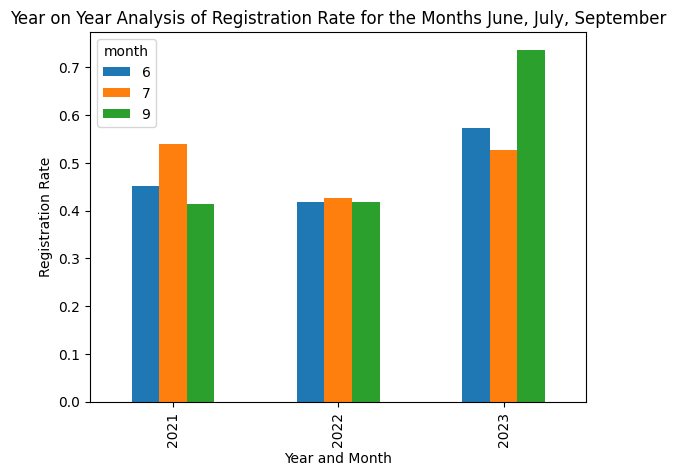

In [13]:
# prompt: Can u build a Year on Year visualisation for registered_count/eligible_count for the years 2021,2022, 2023 for the months June, July, September using matplotlib

import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the sqlite database
conn = sqlite3.connect("employer_registration_data.db")
cur = conn.cursor()
cur.execute("""SELECT year, month, SUM(eligible_count) AS eligible_count, SUM(registration_count) AS registration_count
              FROM employer_registration
              WHERE year IN (2021, 2022, 2023) AND month IN (6, 7, 9)
              GROUP BY year, month""")

data = cur.fetchall()
conn.close()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=["year", "month", "eligible_count", "registration_count"])

# Calculate the registration rate
df["registration_rate"] = df["registration_count"] / df["eligible_count"]

# Group the data by year and month
df_grouped = df.groupby(["year", "month"])["registration_rate"].sum().unstack()

# Create the plot
fig, ax = plt.subplots()
df_grouped.plot(kind="bar", ax=ax)

# Add labels and title
ax.set_xlabel("Year and Month")
ax.set_ylabel("Registration Rate")
ax.set_title("Year on Year Analysis of Registration Rate for the Months June, July, September")

# Show the plot
plt.show()


In [16]:
# prompt: Can u generate and load 1000 rows of data into employer_registration_data for 20 employers

import sqlite3
import random

# Connect to the database
conn = sqlite3.connect("employer_registration_data.db")

# Create a cursor object
cur = conn.cursor()

# Create the table if it doesn't exist
cur.execute("""CREATE TABLE IF NOT EXISTS employer_registration (
    employer_name TEXT,
    state TEXT,
    age INTEGER,
    gender TEXT,
    eligible_count INTEGER,
    registration_count INTEGER,
    month INTEGER,
    year INTEGER,
    day INTEGER
)""")

# Generate 1000 rows of data for 20 employers
employer_names = ["Company A", "Company B", "Company C", "Company D", "Company E", "Company F", "Company G", "Company H", "Company I", "Company J", "Company K", "Company L", "Company M", "Company N", "Company O", "Company P", "Company Q", "Company R", "Company S", "Company T"]
states = ["California", "Texas", "Florida"]
ages = list(range(19, 100))
genders = ["Male", "Female"]
months = list(range(1, 13))
years = [2020, 2021, 2022, 2023]
days = list(range(1, 28))

for i in range(1000):
    employer_name = random.choice(employer_names)
    state = random.choice(states)
    age = random.choice(ages)
    gender = random.choice(genders)
    eligible_count = random.randint(1, 1000)
    registration_count = random.randint(0, eligible_count)
    month = random.choice(months)
    year = random.choice(years)
    day = random.randint(1, 28)

    # Insert the data into the table
    cur.execute("""INSERT INTO employer_registration (employer_name, state, age, gender, eligible_count, registration_count, month, year, day)
                  VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)""", (employer_name, state, age, gender, eligible_count, registration_count, month, year, day))

# Commit the changes to the database
conn.commit()

# Close the database connection
conn.close()
